In [110]:
# Welcome to the ipynb!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
data = pd.read_csv('clean_data.txt', sep='\t')
data_orig = pd.read_csv('clean_data.txt', sep='\t')
data.head(10)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDP2019
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,55869,144,4.2,4.3,11.7,70,15,1501769.0
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,223234,373,4.1,4.2,10.3,223,14,6140514.0
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,24686,97,5.1,4.6,11.5,22,15,762856.0
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,22394,23,4.4,4.3,11.2,23,11,389547.0
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,57826,125,4.5,4.7,11.7,52,10,869049.0
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,10101,32,5.2,4.8,11.2,10,21,246089.0
6,1013,"('Butler County', 'AL')",3.7,15.0,45.2,23.7,16.1,19448,114,5.1,5.1,10.6,23,14,601174.0
7,1015,"('Calhoun County', 'AL')",3.6,15.6,32.8,33.2,18.5,113605,719,4.3,4.5,11.8,164,15,4050073.0
8,1017,"('Chambers County', 'AL')",2.9,18.4,36.7,31.6,13.3,33254,170,5.0,4.9,11.4,60,16,819345.0
9,1019,"('Cherokee County', 'AL')",2.9,18.4,40.3,28.6,12.8,26196,77,4.3,4.7,11.4,26,15,531160.0


In [111]:
# First thing that we need to do is add 2 derived features (RGDP/CAPITA) and 1000s of people per violent crime, then we can go forward with analysis
data = data.assign(RGDPPERCAPITA=data['RGDP2019']/data['POPEST2019'])
data = data.assign(VIOL_CRIME_PER_1000=data['VIOLCRIMECT']/(data['POPEST2019']/1000))
data.head(10)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,POPEST2019,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDP2019,RGDPPERCAPITA,VIOL_CRIME_PER_1000
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,55869,144,4.2,4.3,11.7,70,15,1501769.0,26.880184,2.577458
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,223234,373,4.1,4.2,10.3,223,14,6140514.0,27.507073,1.670892
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,24686,97,5.1,4.6,11.5,22,15,762856.0,30.902374,3.929353
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,22394,23,4.4,4.3,11.2,23,11,389547.0,17.395150,1.027061
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,57826,125,4.5,4.7,11.7,52,10,869049.0,15.028690,2.161657
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,10101,32,5.2,4.8,11.2,10,21,246089.0,24.362835,3.168003
6,1013,"('Butler County', 'AL')",3.7,15.0,45.2,23.7,16.1,19448,114,5.1,5.1,10.6,23,14,601174.0,30.911868,5.861785
7,1015,"('Calhoun County', 'AL')",3.6,15.6,32.8,33.2,18.5,113605,719,4.3,4.5,11.8,164,15,4050073.0,35.650482,6.328947
8,1017,"('Chambers County', 'AL')",2.9,18.4,36.7,31.6,13.3,33254,170,5.0,4.9,11.4,60,16,819345.0,24.638991,5.112167
9,1019,"('Cherokee County', 'AL')",2.9,18.4,40.3,28.6,12.8,26196,77,4.3,4.7,11.4,26,15,531160.0,20.276378,2.939380


In [112]:
# now we need to clean up the data a little bit, replacing missing values with median and so on
data = data.replace('No data', np.nan)
data = data.fillna(data['AVG_DAILY_PM25'].median())
data = data.drop('RGDP2019', axis=1)
data = data.drop('POPEST2019', axis=1)
data

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,144,4.2,4.3,11.7,70,15,26.880184,2.577458
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,373,4.1,4.2,10.3,223,14,27.507073,1.670892
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,97,5.1,4.6,11.5,22,15,30.902374,3.929353
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,23,4.4,4.3,11.2,23,11,17.395150,1.027061
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,125,4.5,4.7,11.7,52,10,15.028690,2.161657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,56037,"('Sweetwater County', 'WY')",4.0,7.2,33.0,37.2,22.5,134,3.5,3.5,5.1,44,10,91.185627,3.164632
3127,56039,"('Teton County', 'WY')",2.8,4.8,14.9,23.3,57.0,49,3.2,3.1,4.9,42,16,95.899719,2.088305
3128,56041,"('Uinta County', 'WY')",4.0,7.3,41.5,35.2,16.0,9,3.7,3.7,5.9,11,11,45.798823,0.444972
3129,56043,"('Washakie County', 'WY')",4.1,10.2,29.8,36.6,23.4,7,3.6,3.5,4.8,16,11,47.321461,0.896861


Now  we are going to need to get the wellbeing metric. In order to do this, we must do two things.
<ol>
    <li>Standardize all data. This should control for outliers.</li>
    <li>Calculate the wellbeing metric (average of all scores)</li>
</ol>

In [113]:
max(data['RGDPPERCAPITA'])

59848.92307692308

This is way too big, but we need this data, so we're going to scale this down using min-max scaling which is given by:

x'=(x-min(x))/(max(x)-min(x))

This will put it on a 0-1 scale, maintaining relative spread.

In [114]:
toScale = data['RGDPPERCAPITA']
minimum = min(toScale)
maximum = max(toScale)
scaled = (toScale - minimum) / (maximum-minimum)
data['RGDPPERCAPITA'] = scaled
data

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,144,4.2,4.3,11.7,70,15,0.000350,2.577458
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,373,4.1,4.2,10.3,223,14,0.000361,1.670892
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,97,5.1,4.6,11.5,22,15,0.000418,3.929353
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,23,4.4,4.3,11.2,23,11,0.000192,1.027061
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,125,4.5,4.7,11.7,52,10,0.000152,2.161657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,56037,"('Sweetwater County', 'WY')",4.0,7.2,33.0,37.2,22.5,134,3.5,3.5,5.1,44,10,0.001425,3.164632
3127,56039,"('Teton County', 'WY')",2.8,4.8,14.9,23.3,57.0,49,3.2,3.1,4.9,42,16,0.001504,2.088305
3128,56041,"('Uinta County', 'WY')",4.0,7.3,41.5,35.2,16.0,9,3.7,3.7,5.9,11,11,0.000666,0.444972
3129,56043,"('Washakie County', 'WY')",4.1,10.2,29.8,36.6,23.4,7,3.6,3.5,4.8,16,11,0.000692,0.896861


In [115]:
max(data['VIOL_CRIME_PER_1000'])

26.82178057844563

In [116]:
data.columns.values

array(['FIPS', '(CTY,ST)', '%UNEMPLOYED', '%LESSHS', '%HS', '%SOMECOLL',
       '%COLLEGEHIGHER', 'VIOLCRIMECT', 'AVG_PHYS_UNHEALTHY_DAYS',
       'AVG_MENT_UNHEALTHY_DAYS', 'AVG_DAILY_PM25', 'NUM_ASSOC',
       '%_SEV_HOUS', 'RGDPPERCAPITA', 'VIOL_CRIME_PER_1000'], dtype=object)

In [117]:
# standardize the data using a StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
num_pipe = Pipeline([
    ('Scale',StandardScaler())
])
num_ele = ['%UNEMPLOYED','VIOLCRIMECT', 'AVG_PHYS_UNHEALTHY_DAYS',
       'AVG_MENT_UNHEALTHY_DAYS', 'AVG_DAILY_PM25', 'NUM_ASSOC',
       '%_SEV_HOUS', 'RGDPPERCAPITA', 'VIOL_CRIME_PER_1000']
standardizer = ColumnTransformer([
    ('num_ele', num_pipe,num_ele)
])
data_processed = pd.DataFrame(standardizer.fit_transform(data))
data_processed

,0,1,2,3,4,5,6,7,8
0,-0.859348,-0.139861,0.392262,0.600662,1.366298,-0.115249,0.177189,-0.047771,0.148782
1,-0.789735,0.001867,0.251723,0.437537,0.651224,0.564493,-0.043136,-0.047196,-0.306844
2,-0.093603,-0.168949,1.657115,1.090039,1.264144,-0.328502,0.177189,-0.044079,0.828224
3,-0.580895,-0.214747,0.673340,0.600662,1.110914,-0.324059,-0.704113,-0.056479,-0.630424
4,-0.859348,-0.151620,0.813880,1.253165,1.366298,-0.195219,-0.924439,-0.058651,-0.060193
...,...,...,...,...,...,...,...,...,...
3126,0.045623,-0.146050,-0.591513,-0.704342,-2.004765,-0.230761,-0.924439,0.011263,0.443887
3127,-0.789735,-0.198656,-1.013130,-1.356844,-2.106918,-0.239647,0.397515,0.015591,-0.097058
3128,0.045623,-0.223412,-0.310434,-0.378091,-1.596151,-0.377372,-0.704113,-0.030403,-0.922973
3129,0.115236,-0.224650,-0.450973,-0.704342,-2.157995,-0.355158,-0.704113,-0.029006,-0.695860


In [118]:
data_processed.columns = ['%UNEMPLOYED','VIOLCRIMECT', 'AVG_PHYS_UNHEALTHY_DAYS',
       'AVG_MENT_UNHEALTHY_DAYS', 'AVG_DAILY_PM25', 'NUM_ASSOC',
       '%_SEV_HOUS', 'RGDPPERCAPITA', 'VIOL_CRIME_PER_1000']
data_processed

,%UNEMPLOYED,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000
0,-0.859348,-0.139861,0.392262,0.600662,1.366298,-0.115249,0.177189,-0.047771,0.148782
1,-0.789735,0.001867,0.251723,0.437537,0.651224,0.564493,-0.043136,-0.047196,-0.306844
2,-0.093603,-0.168949,1.657115,1.090039,1.264144,-0.328502,0.177189,-0.044079,0.828224
3,-0.580895,-0.214747,0.673340,0.600662,1.110914,-0.324059,-0.704113,-0.056479,-0.630424
4,-0.859348,-0.151620,0.813880,1.253165,1.366298,-0.195219,-0.924439,-0.058651,-0.060193
...,...,...,...,...,...,...,...,...,...
3126,0.045623,-0.146050,-0.591513,-0.704342,-2.004765,-0.230761,-0.924439,0.011263,0.443887
3127,-0.789735,-0.198656,-1.013130,-1.356844,-2.106918,-0.239647,0.397515,0.015591,-0.097058
3128,0.045623,-0.223412,-0.310434,-0.378091,-1.596151,-0.377372,-0.704113,-0.030403,-0.922973
3129,0.115236,-0.224650,-0.450973,-0.704342,-2.157995,-0.355158,-0.704113,-0.029006,-0.695860


In [119]:
cols = data.columns.values[2:]
# data_processed.columns.values = cols
data_processed=data_processed.assign(PCT_LESSHS=data['%LESSHS'])
data_processed=data_processed.assign(PCT_HS=data['%HS'])
data_processed=data_processed.assign(PCT_SOMECOLL=data['%SOMECOLL'])
data_processed=data_processed.assign(PCT_COLLEGEHIGER=data['%COLLEGEHIGHER'])
data_processed=data_processed.assign(FIPS=data['FIPS'])
data_processed=data_processed.assign(CTY_ST=data['(CTY,ST)'])
data_processed

,%UNEMPLOYED,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,PCT_LESSHS,PCT_HS,PCT_SOMECOLL,PCT_COLLEGEHIGER,FIPS,CTY_ST
0,-0.859348,-0.139861,0.392262,0.600662,1.366298,-0.115249,0.177189,-0.047771,0.148782,11.5,33.6,28.4,26.6,1001,"('Autauga County', 'AL')"
1,-0.789735,0.001867,0.251723,0.437537,0.651224,0.564493,-0.043136,-0.047196,-0.306844,9.2,27.7,31.3,31.9,1003,"('Baldwin County', 'AL')"
2,-0.093603,-0.168949,1.657115,1.090039,1.264144,-0.328502,0.177189,-0.044079,0.828224,26.8,35.6,26.0,11.6,1005,"('Barbour County', 'AL')"
3,-0.580895,-0.214747,0.673340,0.600662,1.110914,-0.324059,-0.704113,-0.056479,-0.630424,20.9,44.9,23.8,10.4,1007,"('Bibb County', 'AL')"
4,-0.859348,-0.151620,0.813880,1.253165,1.366298,-0.195219,-0.924439,-0.058651,-0.060193,19.5,33.4,34.0,13.1,1009,"('Blount County', 'AL')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,0.045623,-0.146050,-0.591513,-0.704342,-2.004765,-0.230761,-0.924439,0.011263,0.443887,7.2,33.0,37.2,22.5,56037,"('Sweetwater County', 'WY')"
3127,-0.789735,-0.198656,-1.013130,-1.356844,-2.106918,-0.239647,0.397515,0.015591,-0.097058,4.8,14.9,23.3,57.0,56039,"('Teton County', 'WY')"
3128,0.045623,-0.223412,-0.310434,-0.378091,-1.596151,-0.377372,-0.704113,-0.030403,-0.922973,7.3,41.5,35.2,16.0,56041,"('Uinta County', 'WY')"
3129,0.115236,-0.224650,-0.450973,-0.704342,-2.157995,-0.355158,-0.704113,-0.029006,-0.695860,10.2,29.8,36.6,23.4,56043,"('Washakie County', 'WY')"


In [120]:
# add our wellbeing metric to the data (wellbeing = (viol crime per 1000 + avg ment. unhealthy days + avg. phys. unhealthy days + rgdppercapita + %unemployed)/5)
data = data.assign(WELLBEING=(-data_processed['VIOL_CRIME_PER_1000']+data_processed['RGDPPERCAPITA']-data_processed['AVG_MENT_UNHEALTHY_DAYS']-data_processed['AVG_PHYS_UNHEALTHY_DAYS']-data_processed['%UNEMPLOYED']+data_processed['NUM_ASSOC']-data_processed['%_SEV_HOUS']-data_processed['AVG_DAILY_PM25'])/8)
data.head(10)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,144,4.2,4.3,11.7,70,15,0.000350,2.577458,-0.248608
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,373,4.1,4.2,10.3,223,14,0.000361,1.670892,0.039566
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,97,5.1,4.6,11.5,22,15,0.000418,3.929353,-0.661961
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,23,4.4,4.3,11.2,23,11,0.000192,1.027061,-0.106253
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,125,4.5,4.7,11.7,52,10,0.000152,2.161657,-0.230404
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,32,5.2,4.8,11.2,10,21,0.000308,3.168003,-0.817283
6,1013,"('Butler County', 'AL')",3.7,15.0,45.2,23.7,16.1,114,5.1,5.1,10.6,23,14,0.000418,5.861785,-0.791056
7,1015,"('Calhoun County', 'AL')",3.6,15.6,32.8,33.2,18.5,719,4.3,4.5,11.8,164,15,0.000497,6.328947,-0.574128
8,1017,"('Chambers County', 'AL')",2.9,18.4,36.7,31.6,13.3,170,5.0,4.9,11.4,60,16,0.000313,5.112167,-0.702331
9,1019,"('Cherokee County', 'AL')",2.9,18.4,40.3,28.6,12.8,77,4.3,4.7,11.4,26,15,0.000240,2.939380,-0.393918


In [121]:
data.describe()

,FIPS,%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
count,3131.000000,3131.000000,3131.000000,3131.000000,3131.00000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3.131000e+03
mean,30433.217183,3.934462,13.056915,34.155541,30.81268,21.976525,369.983711,3.920888,3.931779,95.940913,14.195784,0.001220,2.281424,-2.460504e-16
std,15115.964612,1.436740,6.260842,7.229430,5.21027,9.575049,1616.034983,0.711659,0.613123,225.121180,4.539461,0.018205,1.990031,5.112161e-01
min,1001.000000,0.800000,1.100000,7.300000,5.20000,0.000000,0.000000,2.300000,2.400000,0.000000,3.000000,0.000000,0.000000,-2.562968e+00
25%,19004.000000,3.000000,8.500000,29.700000,27.30000,15.300000,13.000000,3.400000,3.500000,15.000000,11.000000,0.000377,0.977964,-3.402201e-01
50%,29181.000000,3.700000,11.700000,34.500000,30.80000,19.600000,49.000000,3.900000,3.900000,35.000000,14.000000,0.000555,1.797239,-2.279418e-02
75%,45080.000000,4.600000,16.700000,39.100000,34.20000,26.000000,166.000000,4.400000,4.300000,81.000000,16.000000,0.000797,3.073468,3.547532e-01
max,56045.000000,20.900000,73.600000,57.400000,60.60000,77.600000,42725.000000,6.400000,6.000000,5713.000000,60.000000,1.000000,26.821781,7.003577e+00


In [122]:
data.sort_values('WELLBEING', ascending=False)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
2664,48301,"('Loving County', 'TX')",0.8,19.7,19.7,60.6,0.0,1,3.6,3.7,6.6,0,18,1.000000,5.917160,7.003577
197,6037,"('Los Angeles County', 'CA')",4.6,20.9,20.6,26.0,32.5,42725,3.7,3.6,14.2,5713,34,0.001111,4.255857,2.167340
2958,53033,"('King County', 'WA')",2.6,6.9,15.0,25.6,52.5,6961,3.0,3.2,7.5,1917,18,0.002084,3.089957,1.386164
2915,51610,"('Falls Church city', 'VA')",2.0,1.1,7.3,14.1,77.6,18,2.7,3.1,9.7,30,15,0.126104,1.231443,1.374118
1987,38011,"('Bowman County', 'ND')",1.6,10.9,34.6,30.2,24.2,2,2.5,2.4,5.1,8,5,0.001277,0.661376,1.322275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2290,"('Yukon-Koyukuk Census Area', 'AK')",12.6,14.0,40.2,32.2,13.6,0,5.2,4.6,9.4,4,50,0.000814,0.000000,-2.035543
81,2180,"('Nome Census Area', 'AK')",9.8,15.4,41.1,27.3,16.1,48,5.6,4.8,9.4,7,51,0.000605,4.798081,-2.231687
191,6025,"('Imperial County', 'CA')",20.9,30.3,24.3,30.2,15.2,583,4.4,4.1,13.5,86,28,0.000729,3.217173,-2.328314
70,2050,"('Bethel Census Area', 'AK')",11.5,19.1,46.4,22.6,11.9,56,5.7,4.9,9.4,7,60,0.000531,3.045796,-2.555862


Loving County appears to have a wildly high GDP per capita. I attribute this to the fact that their economy is based entirely on oil, and though they only have 169 people, a lot of money goes through the county. For the sake of a measured observation, I will remove this county from consideration. Additionally, 

In [123]:
loving_ind = data[(data.FIPS == 48301)].index
data_no_loving = data.drop(loving_ind)
data_no_loving.sort_values('WELLBEING', ascending=False)

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING
197,6037,"('Los Angeles County', 'CA')",4.6,20.9,20.6,26.0,32.5,42725,3.7,3.6,14.2,5713,34,0.001111,4.255857,2.167340
2958,53033,"('King County', 'WA')",2.6,6.9,15.0,25.6,52.5,6961,3.0,3.2,7.5,1917,18,0.002084,3.089957,1.386164
2915,51610,"('Falls Church city', 'VA')",2.0,1.1,7.3,14.1,77.6,18,2.7,3.1,9.7,30,15,0.126104,1.231443,1.374118
1987,38011,"('Bowman County', 'ND')",1.6,10.9,34.6,30.2,24.2,2,2.5,2.4,5.1,8,5,0.001277,0.661376,1.322275
602,17031,"('Cook County', 'IL')",4.0,12.9,23.1,25.2,38.8,28830,3.6,3.6,15.0,3716,23,0.001092,5.597805,1.295525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2290,"('Yukon-Koyukuk Census Area', 'AK')",12.6,14.0,40.2,32.2,13.6,0,5.2,4.6,9.4,4,50,0.000814,0.000000,-2.035543
81,2180,"('Nome Census Area', 'AK')",9.8,15.4,41.1,27.3,16.1,48,5.6,4.8,9.4,7,51,0.000605,4.798081,-2.231687
191,6025,"('Imperial County', 'CA')",20.9,30.3,24.3,30.2,15.2,583,4.4,4.1,13.5,86,28,0.000729,3.217173,-2.328314
70,2050,"('Bethel Census Area', 'AK')",11.5,19.1,46.4,22.6,11.9,56,5.7,4.9,9.4,7,60,0.000531,3.045796,-2.555862


0.25601944235241514


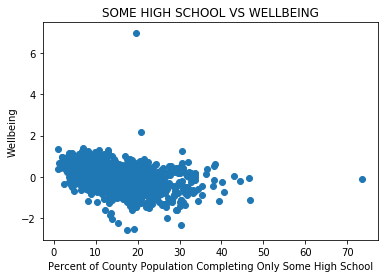

In [124]:
# begin by extracting our data of interest and placing them into scatterplots
plt.scatter(data['%LESSHS'],data['WELLBEING'])
slope, intercept, r_value, p_value, std_err = linregress(data['%LESSHS'], data['WELLBEING'])
print(r_value**2)
plt.title('SOME HIGH SCHOOL VS WELLBEING')
plt.xlabel('Percent of County Population Completing Only Some High School')
plt.ylabel('Wellbeing')
plt.show()

In [125]:
max(data_no_loving['WELLBEING'])

2.1673397220207824

From this scatter, we can see that those counties with extremely high GDP skew the wellbeing metric too far. To deal with this for initial analysis, we will simply drop the top 20 counties, though this is not the best long-term choice. We should, instead, rethink the wellbeing metric. Perhaps we could use the sigmoid function, this would bound on 0-1. Alternatively, we may standardize the values used in the mean (if normality holds). In general, though, we need to find a metric which has relatively small scale/is less sensitive to extreme outliers.

0.2844557550912108


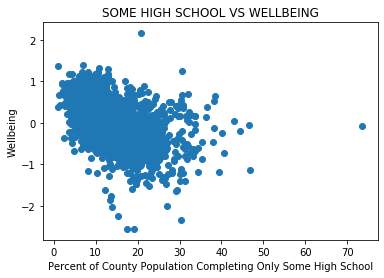

In [126]:
plt.scatter(data_no_loving['%LESSHS'],data_no_loving['WELLBEING'])
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%LESSHS'], data_no_top_20['WELLBEING'])
print(r_value**2)
plt.title('SOME HIGH SCHOOL VS WELLBEING')
plt.xlabel('Percent of County Population Completing Only Some High School')
plt.ylabel('Wellbeing')
plt.show()

0.10590371772513417


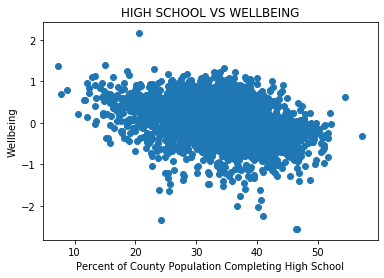

In [127]:
plt.scatter(data_no_loving['%HS'],data_no_loving['WELLBEING'])
plt.title('HIGH SCHOOL VS WELLBEING')
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%HS'], data_no_top_20['WELLBEING'])
print(r_value**2)
plt.xlabel('Percent of County Population Completing High School')
plt.ylabel('Wellbeing')
plt.show()

0.12511759909751438


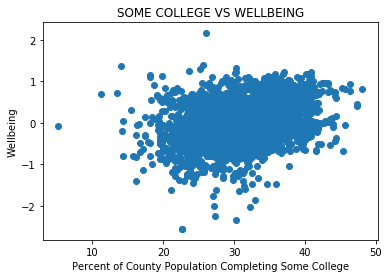

In [128]:
plt.scatter(data_no_loving['%SOMECOLL'],data_no_loving['WELLBEING'])
plt.title('SOME COLLEGE VS WELLBEING')
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%SOMECOLL'], data_no_top_20['WELLBEING'])
print(r_value**2)
plt.xlabel('Percent of County Population Completing Some College')
plt.ylabel('Wellbeing')
plt.show()

0.16543851643912416


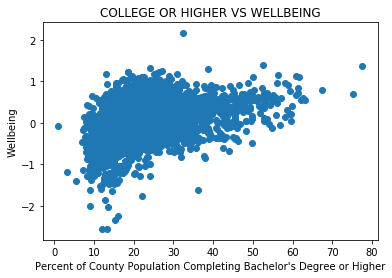

In [129]:
plt.scatter(data_no_loving['%COLLEGEHIGHER'],data_no_loving['WELLBEING'])
plt.title('COLLEGE OR HIGHER VS WELLBEING')
slope, intercept, r_value, p_value, std_err = linregress(data_no_top_20['%COLLEGEHIGHER'], data_no_top_20['WELLBEING'])
print(r_value**2)
plt.xlabel('Percent of County Population Completing Bachelor\'s Degree or Higher')
plt.ylabel('Wellbeing')
plt.show()

Now we have a decent idea that these things are statiscally related. Now, it's time to test whether or not the differences we observe are actually statistically significant!

We'll be performing a test for diffences between population proportions for each educational attainment category. We'll divide up into 2 categories:
<ol>
    <li>"Above Average Well-being" (scores > 0)</li>
    <li>"Below Average Well-being" (scores < 0)</li>
</ol>

These are the two populations we'll be looking at. We'll then convert all of the proportions in our data to numbers of people, from which point, we'll get the total number of people in each population, then calculate the appropriate statistic.

In [137]:
# first, we'll separate our loving-less data out into 2 sets
data_before_split = data_no_loving.assign(POPEST2019 = data_orig['POPEST2019'])
data_above_avg = data_before_split[data_before_split.WELLBEING > 0]
data_below_avg = data_before_split[data_before_split.WELLBEING < 0]

In [138]:
print(max(data_above_avg.WELLBEING))
print(min(data_above_avg.WELLBEING))

2.1673397220207824
0.0008564792497966212


In [139]:
print(max(data_below_avg.WELLBEING))
print(min(data_below_avg.WELLBEING))

-0.000492739613366322
-2.562967577292952


In [140]:
data_below_avg

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,AVG_DAILY_PM25,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING,POPEST2019
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,144,4.2,4.3,11.7,70,15,0.000350,2.577458,-0.248608,55869
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,97,5.1,4.6,11.5,22,15,0.000418,3.929353,-0.661961,24686
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,23,4.4,4.3,11.2,23,11,0.000192,1.027061,-0.106253,22394
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,125,4.5,4.7,11.7,52,10,0.000152,2.161657,-0.230404,57826
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,32,5.2,4.8,11.2,10,21,0.000308,3.168003,-0.817283,10101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,55059,"('Kenosha County', 'WI')",3.9,9.9,30.1,33.9,26.1,348,3.5,3.7,11.2,129,18,0.000532,2.052359,-0.091412,169561
3075,55078,"('Menominee County', 'WI')",8.1,8.1,42.6,31.4,17.9,0,6.3,5.8,8.0,4,20,0.000416,0.000000,-1.169027,4556
3076,55079,"('Milwaukee County', 'WI')",3.9,11.7,28.4,29.0,31.0,9604,4.0,4.3,11.5,821,22,0.000874,10.155161,-0.553301,945726
3087,55101,"('Racine County', 'WI')",4.0,9.5,31.6,33.7,25.2,390,3.7,3.6,11.7,185,14,0.000565,1.986644,-0.001161,196311


In [144]:
# get columns for actual population counts
data_below_fin = data_below_avg.assign(CT_LESSHS=(data_below_avg['%LESSHS']/100)*data_below_avg['POPEST2019'])
data_below_fin = data_below_fin.assign(CT_HS=(data_below_avg['%HS']/100)*data_below_avg['POPEST2019'])
data_below_fin = data_below_fin.assign(CT_SOMECOLL=(data_below_avg['%SOMECOLL']/100)*data_below_avg['POPEST2019'])
data_below_fin = data_below_fin.assign(CT_COLLHIGHER=(data_below_avg['%COLLEGEHIGHER']/100)*data_below_avg['POPEST2019'])
data_below_fin

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,...,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING,POPEST2019,CT_LESSHS,CT_HS,CT_SOMECOLL,CT_COLLHIGHER
0,1001,"('Autauga County', 'AL')",2.7,11.5,33.6,28.4,26.6,144,4.2,4.3,...,70,15,0.000350,2.577458,-0.248608,55869,6424.935,18771.984,15866.796,14861.154
2,1005,"('Barbour County', 'AL')",3.8,26.8,35.6,26.0,11.6,97,5.1,4.6,...,22,15,0.000418,3.929353,-0.661961,24686,6615.848,8788.216,6418.360,2863.576
3,1007,"('Bibb County', 'AL')",3.1,20.9,44.9,23.8,10.4,23,4.4,4.3,...,23,11,0.000192,1.027061,-0.106253,22394,4680.346,10054.906,5329.772,2328.976
4,1009,"('Blount County', 'AL')",2.7,19.5,33.4,34.0,13.1,125,4.5,4.7,...,52,10,0.000152,2.161657,-0.230404,57826,11276.070,19313.884,19660.840,7575.206
5,1011,"('Bullock County', 'AL')",3.7,25.3,40.3,22.3,12.1,32,5.2,4.8,...,10,21,0.000308,3.168003,-0.817283,10101,2555.553,4070.703,2252.523,1222.221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,55059,"('Kenosha County', 'WI')",3.9,9.9,30.1,33.9,26.1,348,3.5,3.7,...,129,18,0.000532,2.052359,-0.091412,169561,16786.539,51037.861,57481.179,44255.421
3075,55078,"('Menominee County', 'WI')",8.1,8.1,42.6,31.4,17.9,0,6.3,5.8,...,4,20,0.000416,0.000000,-1.169027,4556,369.036,1940.856,1430.584,815.524
3076,55079,"('Milwaukee County', 'WI')",3.9,11.7,28.4,29.0,31.0,9604,4.0,4.3,...,821,22,0.000874,10.155161,-0.553301,945726,110649.942,268586.184,274260.540,293175.060
3087,55101,"('Racine County', 'WI')",4.0,9.5,31.6,33.7,25.2,390,3.7,3.6,...,185,14,0.000565,1.986644,-0.001161,196311,18649.545,62034.276,66156.807,49470.372


In [146]:
# get columns for actual population counts
data_above_fin = data_above_avg.assign(CT_LESSHS=(data_above_avg['%LESSHS']/100)*data_above_avg['POPEST2019'])
data_above_fin = data_above_fin.assign(CT_HS=(data_above_avg['%HS']/100)*data_above_avg['POPEST2019'])
data_above_fin = data_above_fin.assign(CT_SOMECOLL=(data_above_avg['%SOMECOLL']/100)*data_above_avg['POPEST2019'])
data_above_fin = data_above_fin.assign(CT_COLLEGEHIGHER=(data_above_avg['%COLLEGEHIGHER']/100)*data_above_avg['POPEST2019'])
data_above_fin

,FIPS,"(CTY,ST)",%UNEMPLOYED,%LESSHS,%HS,%SOMECOLL,%COLLEGEHIGHER,VIOLCRIMECT,AVG_PHYS_UNHEALTHY_DAYS,AVG_MENT_UNHEALTHY_DAYS,...,NUM_ASSOC,%_SEV_HOUS,RGDPPERCAPITA,VIOL_CRIME_PER_1000,WELLBEING,POPEST2019,CT_LESSHS,CT_HS,CT_SOMECOLL,CT_COLLEGEHIGHER
1,1003,"('Baldwin County', 'AL')",2.8,9.2,27.7,31.3,31.9,373,4.1,4.2,...,223,14,0.000361,1.670892,0.039566,223234,20537.528,61835.818,69872.242,71211.646
58,1117,"('Shelby County', 'AL')",2.2,7.3,19.8,29.9,42.9,188,3.7,3.9,...,234,11,0.000675,0.863566,0.256284,217702,15892.246,43104.996,65092.898,93394.158
67,2013,"('Aleutians East Borough', 'AK')",2.3,14.5,43.5,30.5,11.5,0,3.4,2.7,...,2,14,0.000995,0.000000,0.555965,3337,483.865,1451.595,1017.785,383.755
68,2016,"('Aleutians West Census Area', 'AK')",3.1,10.5,39.0,33.4,17.0,10,3.0,2.6,...,4,18,0.001077,1.774938,0.357013,5634,591.570,2197.260,1881.756,957.780
71,2060,"('Bristol Bay Borough', 'AK')",5.3,6.0,37.0,34.5,22.5,0,3.7,3.5,...,1,16,0.002597,0.000000,0.034448,836,50.160,309.320,288.420,188.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,56037,"('Sweetwater County', 'WY')",4.0,7.2,33.0,37.2,22.5,134,3.5,3.5,...,44,10,0.001425,3.164632,0.439506,42343,3048.696,13973.190,15751.596,9527.175
3127,56039,"('Teton County', 'WY')",2.8,4.8,14.9,23.3,57.0,49,3.2,3.1,...,42,16,0.001504,2.088305,0.592764,23464,1126.272,3496.136,5467.112,13374.480
3128,56041,"('Uinta County', 'WY')",4.0,7.3,41.5,35.2,16.0,9,3.7,3.7,...,11,11,0.000666,0.444972,0.432295,20226,1476.498,8393.790,7119.552,3236.160
3129,56043,"('Washakie County', 'WY')",4.1,10.2,29.8,36.6,23.4,7,3.6,3.5,...,16,11,0.000692,0.896861,0.526735,7805,796.110,2325.890,2856.630,1826.370


Now, we will state our hypotheses and carry out actual tests.

p_1 = proportion of people living in below_avg wellbeing counties with less than a hs diploma

p_2 = proportion of people living in above_avg wellbeing counties with less than a hs diploma

H0: p_1-p_2=0

Ha: p1-p2 \> 0

In [148]:
total_below_pop = sum(data_below_fin['POPEST2019'])
total_above_pop = sum(data_above_fin['POPEST2019'])
total_less_hs_below = round(sum(data_below_fin['CT_LESSHS']))
total_less_hs_above = round(sum(data_above_fin['CT_LESSHS']))
p_hat_1 = total_less_hs_below/total_below_pop
p_hat_2 = total_less_hs_above/total_above_pop

In [155]:
print(total_above_pop)
print(total_below_pop)

198873771
129261598


In [149]:
p_hat_1

0.1421428505007342

In [150]:
p_hat_2

0.10651078768954404

In [157]:
p_hat = (total_less_hs_below+total_less_hs_above)/(total_above_pop+total_below_pop)
print(p_hat)
num=p_hat_1-p_hat_2
denom=np.sqrt(p_hat*(1-p_hat)*((1/total_above_pop)+(1/total_below_pop)))
num/denom

0.12054724280575801


968.6191690382891

Thus, we get a Z-value of 968, the p-value for which is approx. 0, so we reject H0 and conclude that there is in fact a difference between the proportion of people which live in these 2 categories. Specifically, that a higher proportion of people with less than a HS degree live in below-average-wellbeing counties than do in above.

Now we will do a similar test for the HS category.

In [158]:
total_hs_below = round(sum(data_below_fin['CT_HS']))
total_hs_above = round(sum(data_above_fin['CT_HS']))
p_hat_1 = total_hs_below/total_below_pop
p_hat_2 = total_hs_above/total_above_pop
print(p_hat_1)
print(p_hat_2)

0.30995262026700304
0.24176088560215414


p_1 = proportion of people living in below_avg wellbeing counties with a hs diploma

p_2 = proportion of people living in above_avg wellbeing counties with a hs diploma

H0: p_1-p_2=0

Ha: p1-p2 \> 0

In [159]:
p_hat = (total_hs_below+total_hs_above)/(total_above_pop+total_below_pop)
print(p_hat)
num=p_hat_1-p_hat_2
denom=np.sqrt(p_hat*(1-p_hat)*((1/total_above_pop)+(1/total_below_pop)))
num/denom

0.26862349605476393


1361.7150268004575

Here, we end up with a z-value of 1361, to similar result as with the less than HS category.

In [160]:
total_somecoll_below = round(sum(data_below_fin['CT_SOMECOLL']))
total_somecoll_above = round(sum(data_above_fin['CT_SOMECOLL']))
p_hat_1 = total_somecoll_below/total_below_pop
p_hat_2 = total_somecoll_above/total_above_pop
print(p_hat_1)
print(p_hat_2)

0.3003250818545505
0.28268307940919973


p_1 = proportion of people living in below_avg wellbeing counties with some college

p_2 = proportion of people living in above_avg wellbeing counties with some college

H0: p_1-p_2=0

Ha: p1-p2 \> 0

In [161]:
p_hat = (total_somecoll_below+total_somecoll_above)/(total_above_pop+total_below_pop)
print(p_hat)
num=p_hat_1-p_hat_2
denom=np.sqrt(p_hat*(1-p_hat)*((1/total_above_pop)+(1/total_below_pop)))
num/denom

0.2896327521462644


344.2544556559426

Much smaller Z, but still approximately zero, so reject this H0 as well.

In [169]:
total_coll_below = round(sum(data_below_fin['CT_COLLHIGHER']))
total_coll_above = round(sum(data_above_fin['CT_COLLEGEHIGHER']))
p_hat_1 = total_coll_below/total_below_pop
p_hat_2 = total_coll_above/total_above_pop
print(p_hat_1)
print(p_hat_2)

0.2476044045192757
0.36916335236585823


p_1 = proportion of people living in below_avg wellbeing counties with college or higher

p_2 = proportion of people living in above_avg wellbeing counties with college or higher

H0: p_1-p_2=0

Ha: p1-p2 \< 0

In [170]:
p_hat = (total_coll_below+total_coll_above)/(total_above_pop+total_below_pop)
print(p_hat)
num=p_hat_1-p_hat_2
denom=np.sqrt(p_hat*(1-p_hat)*((1/total_above_pop)+(1/total_below_pop)))
num/denom

0.3212779205157857


-2304.0796915139445

Once again, this z-value corresponds to a p-value of approx. 0, so we will reject H0 and conclude that a higher proportion of people with a college or higher degree live in areas with an above-average wellbeing score.

Ethical Concerns:
<ul>
    <li>GDP significantly advantages wealthy counties/localities in wellbeing score</li>
    <li>Data does not exist for most of these sets for Puerto Rico, so it has been excluded entirely</li>
    <li>By virtue of having this wellbeing metric, we are essentially saying that certain things are good and/or bad</li>\
    <li>Systematic exclusion of more subjective well-being metrics due to lack of workable data</li>
</ul>
Current Issues:
<ul>
    <li>Extreme sensitivity of current wellbeing metric to outliers, needs to be changed</li>
    <li>Virginia Combined Areas not considered as separate, will need to be fixed</li>
</ul>
What else will we do:
<ul>
    <li>Resolve the issues listed above</li>
    <li>Run 4-way ANOVA test to determine statistically significant differences between the means</li>
    <li>Run k-means classification algorithm to get similar counties grouped together, this may solve the issue of extreme outliers</li>
</ul>